# Pymaceuticals Inc.
---

### Analysis

1. Correlation Between Weight and Tumor Size:

    - There is a strong positive correlation between mouse weight and average tumor volume, which suggests that larger mice tend to have larger tumors.

2. Effectiveness of Ramicane:

   - Among the treatment regimens, Ramicane shows promising results in reducing tumor size. Ramicane appears to be effective in limiting the maximum tumor size.

3. Treatment Testing and Success Rates:
    
   - Capomulin and Ramicane were the most tested treatments in this study. These treatments also showed more favorable outcomes in terms of reducing tumor size.

## Overall Summary
The data suggests that both Ramicane and Capomulin are effective treatments for reducing tumor size in mice. Also, the positive correlation between mouse weight and tumor size underscores the need to consider physiological factors when evaluating treatment efficacy.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = mouse_metadata.merge(study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Check the number of mice
number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of mice: {number_of_mice}")

Number of mice: 249


In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Optional: Get the list of duplicate "Mouse ID"
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data["Mouse ID"].nunique()
print(f"Number of mice in the clean DataFrame: {number_of_mice_clean}")

Number of mice in the clean DataFrame: 248


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

summary_stats.columns = [
    'Mean Tumor Volume', 
    'Median Tumor Volume', 
    'Tumor Volume Variance', 
    'Tumor Volume Std. Dev.', 
    'Tumor Volume Std. Err.'
]

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_advanced


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

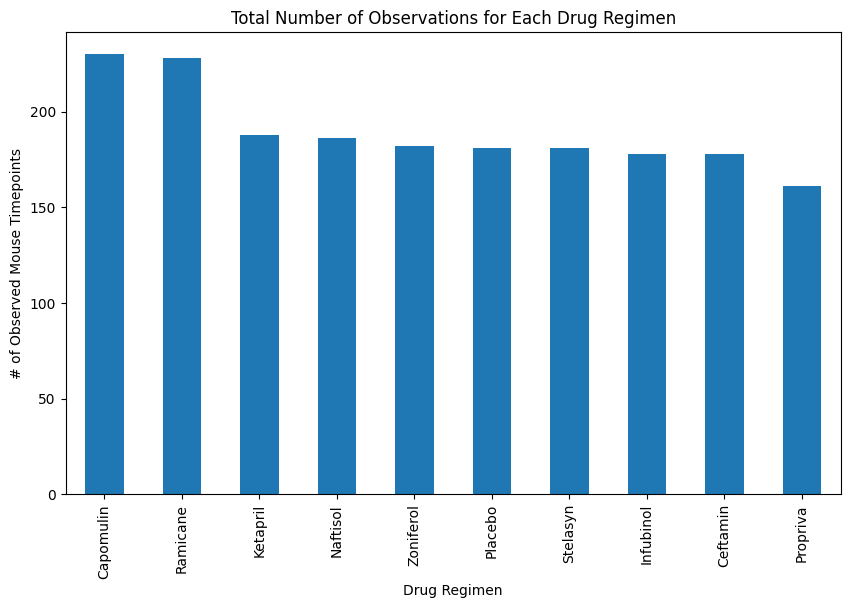

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = mouse_study_df['Drug Regimen'].value_counts()

drug_regimen_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


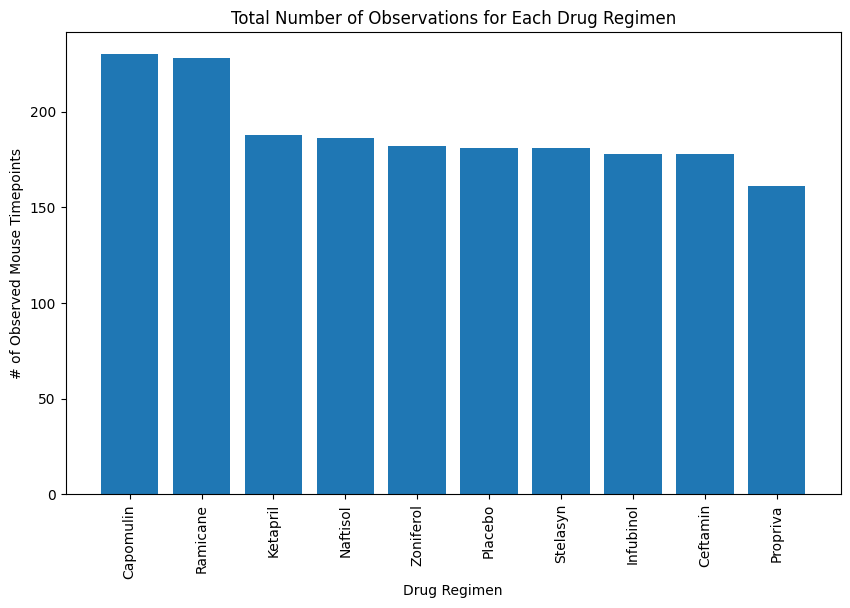

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = mouse_study_df['Drug Regimen'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title('Total Number of Observations for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

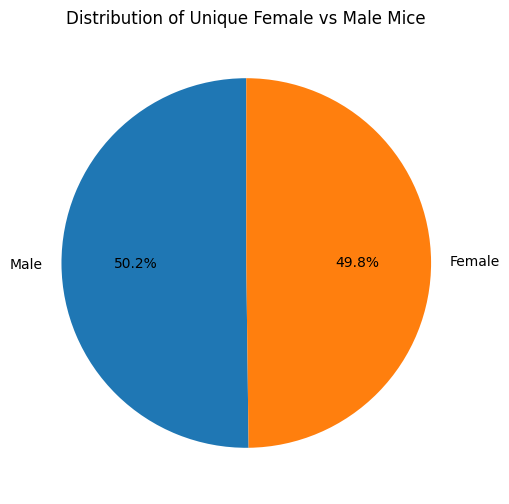

In [21]:
# Get the unique mice with their gender (use only unique Mouse IDs)
unique_mice_gender = mouse_study_df.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')
plt.show()


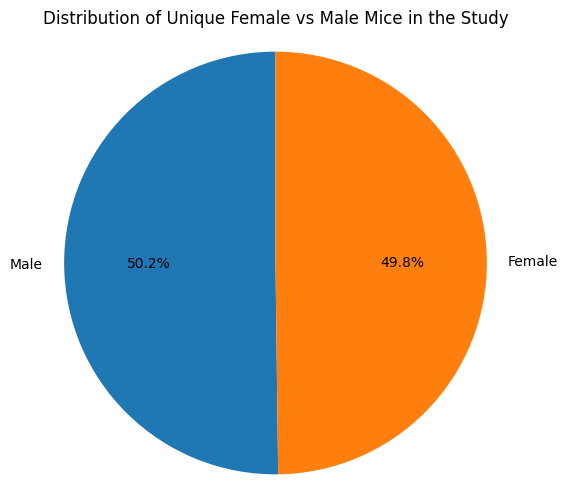

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
unique_mice_gender = mouse_study_df.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()

# Generate a pie chart using pyplot
plt.figure(figsize=(6, 6))
plt.pie(unique_mice_gender.values, labels=unique_mice_gender.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Unique Female vs Male Mice in the Study')
plt.axis('equal')  
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
filtered_data = mouse_study_df[mouse_study_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [26]:
# Put treatments into a list for the for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Loop through the treatments to calculate the IQR and identify potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add this data to the list for plotting later
    tumor_vol_data.append(treatment_data)
    
    # Calculate quartiles
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outlier boundaries
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print results
    print(f'{treatment}:')
    print(f' - Lower Quartile: {lowerq}')
    print(f' - Upper Quartile: {upperq}')
    print(f' - IQR: {iqr}')
    print(f' - Potential outliers: {outliers.values}')
    print('-------------------------------------')

Capomulin:
 - Lower Quartile: 32.37735684
 - Upper Quartile: 40.1592203
 - IQR: 7.781863460000004
 - Potential outliers: []
-------------------------------------
Ramicane:
 - Lower Quartile: 31.56046955
 - Upper Quartile: 40.65900627
 - IQR: 9.098536719999998
 - Potential outliers: []
-------------------------------------
Infubinol:
 - Lower Quartile: 54.04860769
 - Upper Quartile: 65.52574285
 - IQR: 11.477135160000003
 - Potential outliers: [36.3213458]
-------------------------------------
Ceftamin:
 - Lower Quartile: 48.72207785
 - Upper Quartile: 64.29983003
 - IQR: 15.577752179999997
 - Potential outliers: []
-------------------------------------


C:\Users\madis\AppData\Local\Temp\ipykernel_22792\640119259.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o'))


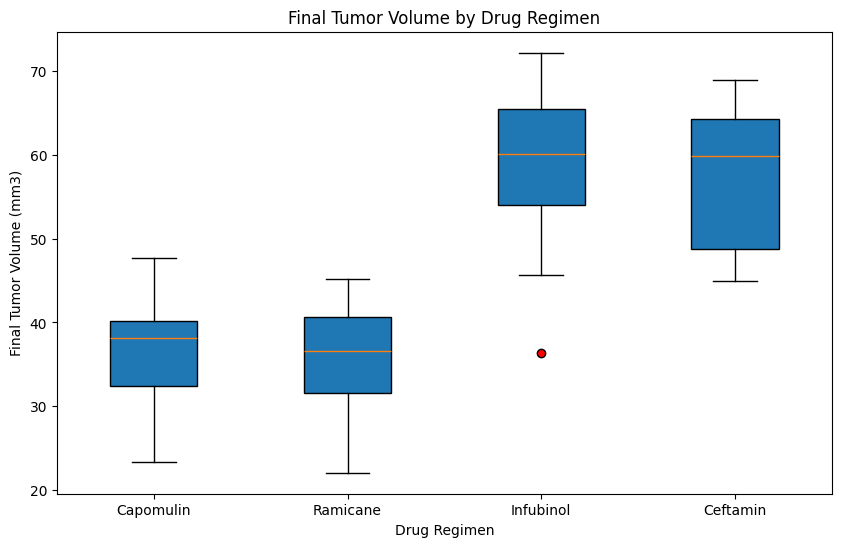

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
box = plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

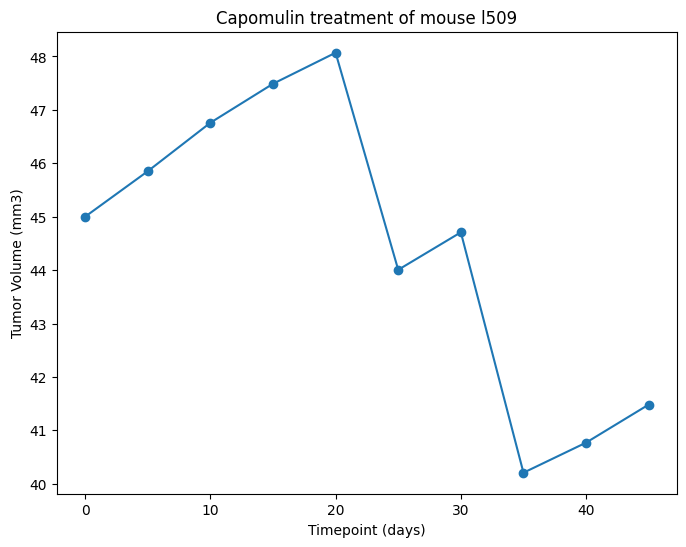

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
capomulin_mouse_data = mouse_study_df[(mouse_study_df['Drug Regimen'] == 'Capomulin') & (mouse_study_df['Mouse ID'] == mouse_id)]
plt.figure(figsize=(8, 6))
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


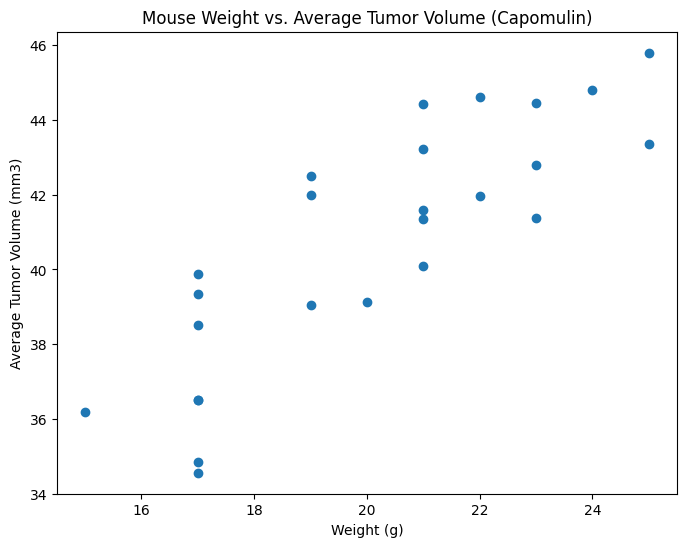

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the mouse weight for each mouse
mouse_weight = capomulin_data.drop_duplicates(subset=['Mouse ID'])[['Mouse ID', 'Weight (g)']].set_index('Mouse ID')

# Combine the average tumor volume with mouse weight into a single DataFrame
capomulin_avg_data = pd.merge(mouse_weight, avg_tumor_volume, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. the average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

# Titles etc.
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


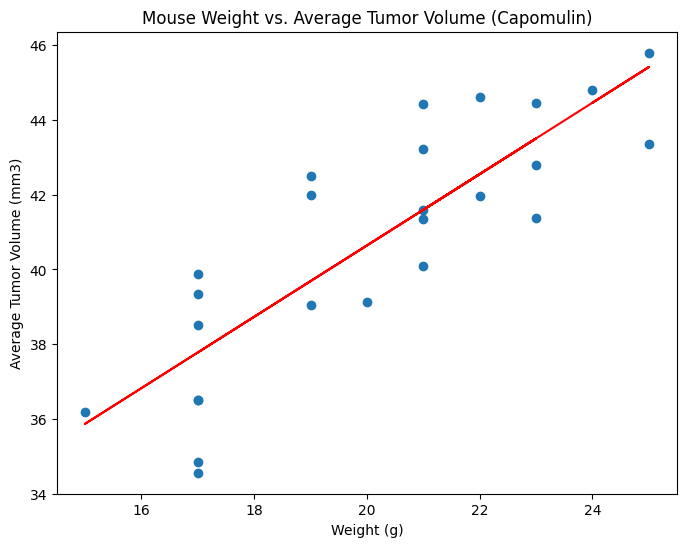

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

x_values = capomulin_avg_data['Weight (g)']
y_values = capomulin_avg_data['Tumor Volume (mm3)']

correlation_coefficient = x_values.corr(y_values)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate regression values
regress_values = slope * x_values + intercept

# Generate scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color='red')  # Plot the regression line

# Titles etc.
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()
